Все значения в 14-м столбце являются числами.
Все значения в 15-м столбце являются числами.


Избирателей всего: 47562702, Проголосовало: 32014110, Явка - 67.3%
Минимальная явка - 0.4934519735341091, Максимальная явка - 0.8025879682179342


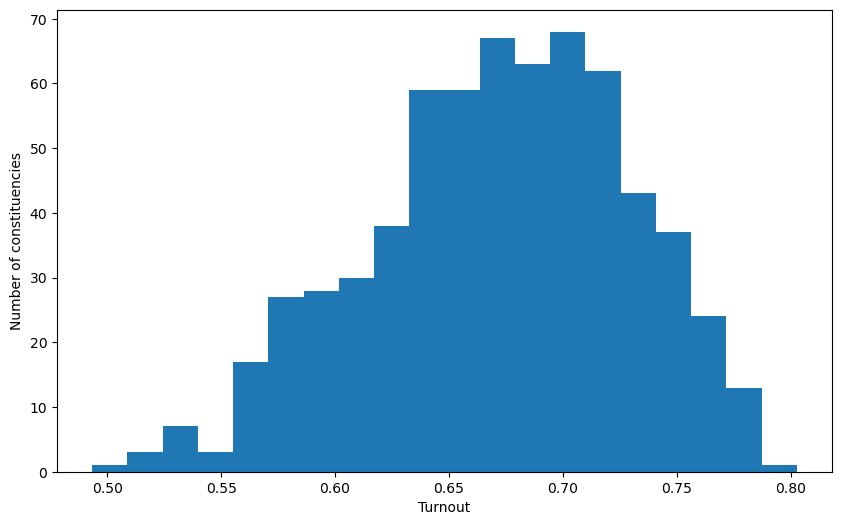

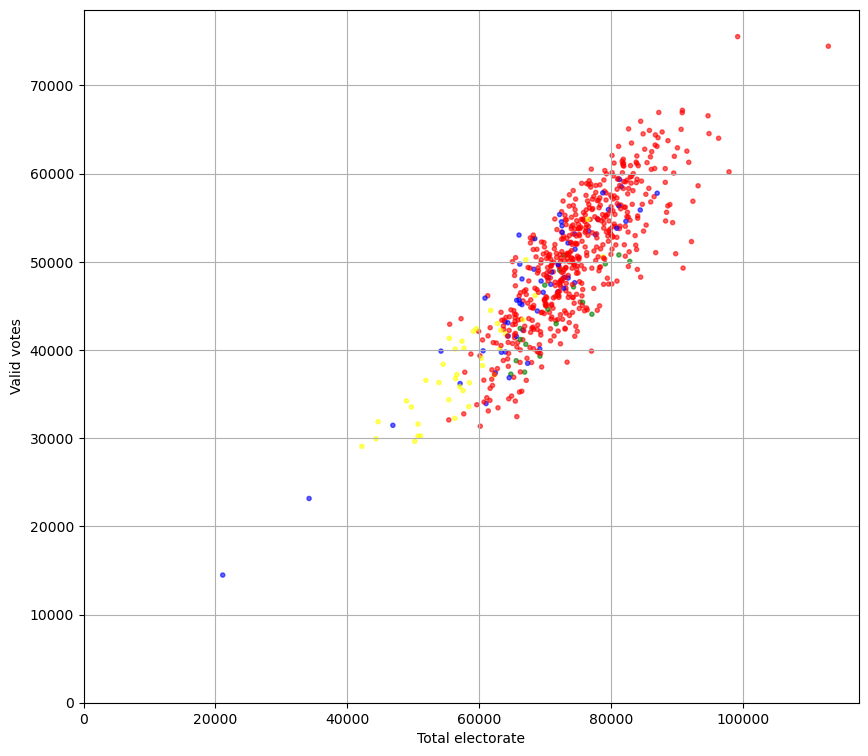

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

file_path = "HoC-GE2019-results-by-constituency.csv"
df = pd.read_csv(file_path)
x_values = df.iloc[:, 14]  
y_values = df.iloc[:, 15] 
df['Country name']= df.iloc[:, 5].replace({'England':'red', 'Wales':'yellow', 'Scotland':'blue', 'Northern Ireland':'green'})
#print(df.columns)
try:
    pd.to_numeric(x_values) 
    print("Все значения в 14-м столбце являются числами.")
except ValueError:
    print("В 14-м столбце есть выброс.")
try:
    pd.to_numeric(y_values) 
    print("Все значения в 15-м столбце являются числами.")
except ValueError:
    print("В 15-м столбце есть выброс.")
sum_x = sum(x_values)
sum_y = sum(y_values)
print(f"\n\nИзбирателей всего: {sum_x}, Проголосовало: {sum_y}, Явка - {100*sum_y/sum_x:.1f}%")
z_values = y_values/x_values
print(f"Минимальная явка - {np.min(z_values)}, Максимальная явка - {np.max(z_values)}")
plt.figure(figsize=(10, 6))
plt.hist(z_values, bins=20)
plt.xlabel('Turnout')
plt.ylabel('Number of constituencies')
plt.title('')
plt.show()

plt.figure(figsize=(10, 9)) 
plt.scatter(x_values, y_values, c=df['Country name'],  s=9, alpha=0.6)  
plt.title('')  
plt.xlabel('Total electorate') 
plt.ylabel('Valid votes')
plt.xlim(0, ) 
plt.ylim(0, ) 
plt.grid(True) 
plt.show() 

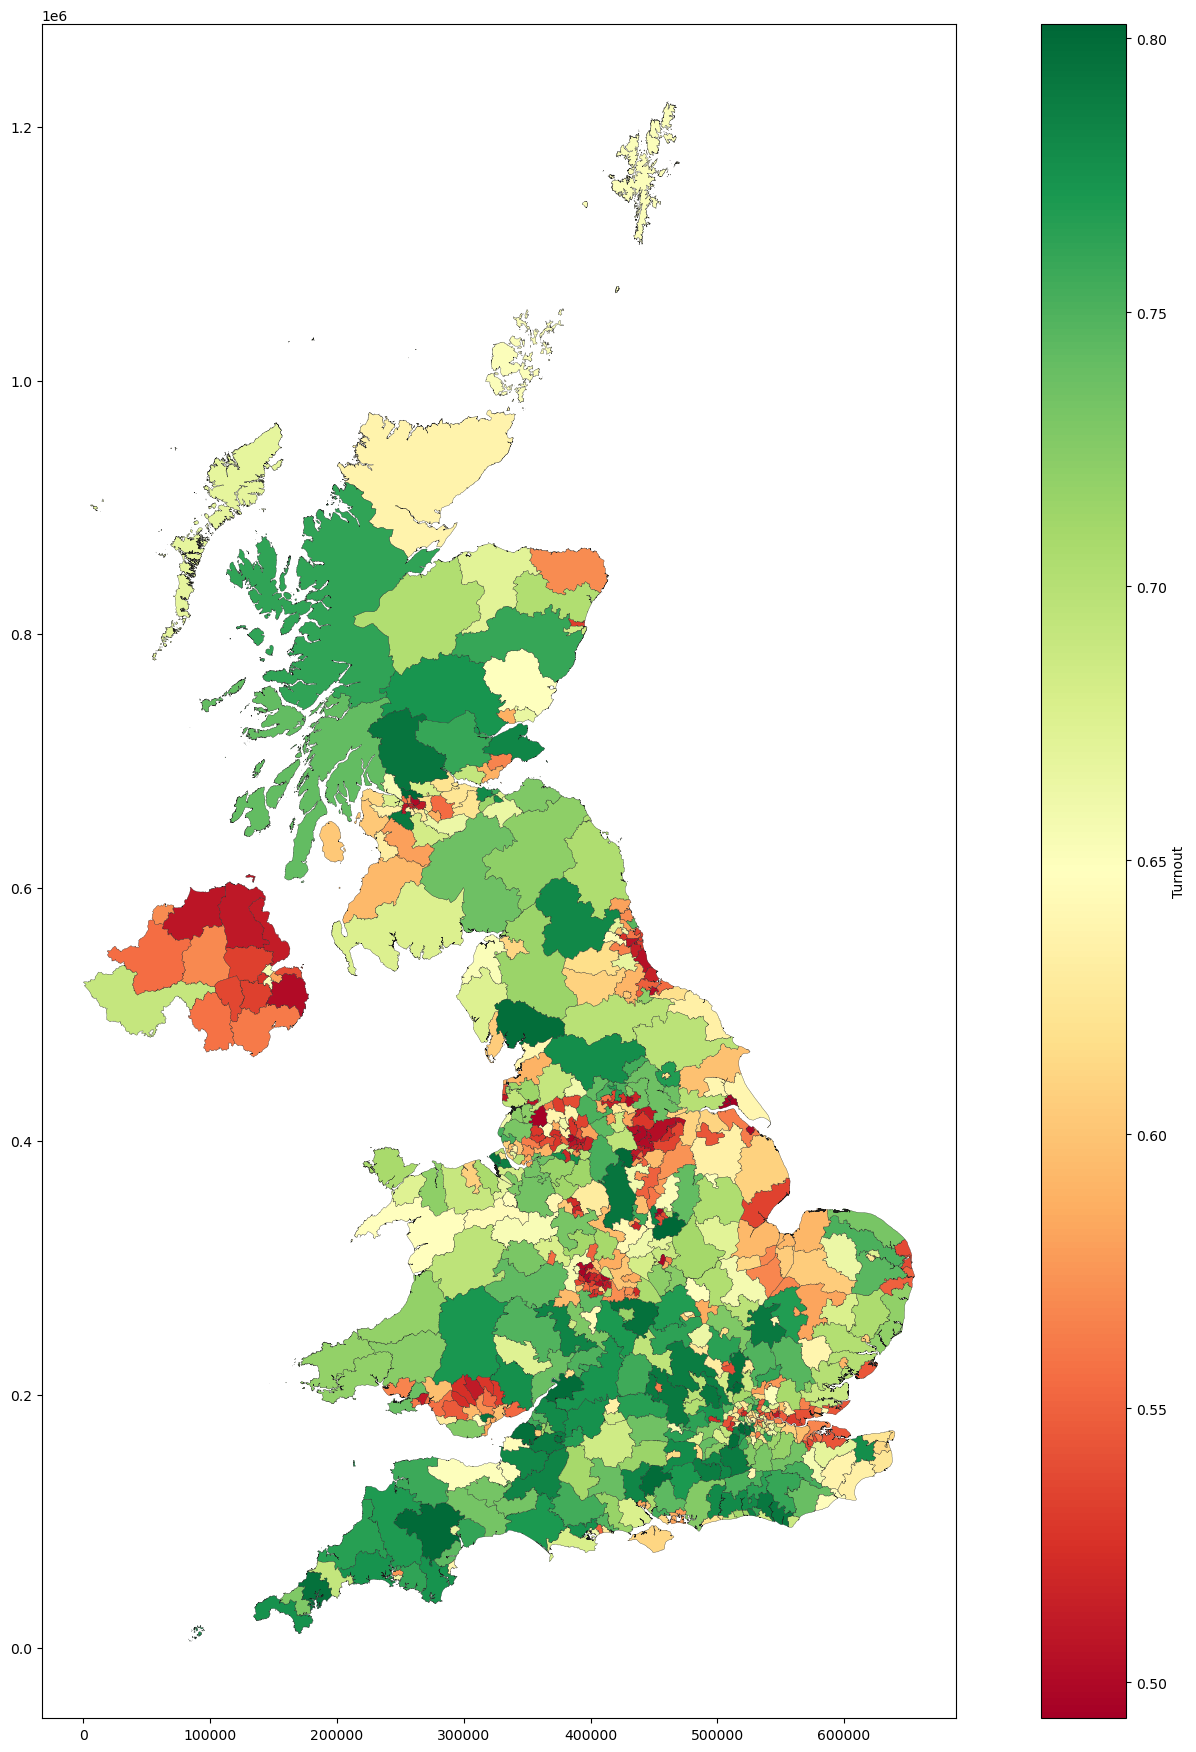

In [39]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

elections = gpd.read_file('WPC_Dec_2019.geojson')

new_array = np.column_stack((df.iloc[:, 0], z_values))
turnout = pd.DataFrame(new_array, columns=['pcon19cd', 'turnout_percentage'])

merged_data = elections.merge(turnout, on='pcon19cd', how='left')
fig, ax = plt.subplots(figsize=(22, 22))

merged_data.plot(ax=ax, column='turnout_percentage', cmap='RdYlGn', linewidth=0.2, edgecolor='0.1',figsize=(22,22))
norm = Normalize(vmin=merged_data['turnout_percentage'].min(), vmax=merged_data['turnout_percentage'].max())
sm = cm.ScalarMappable(cmap='RdYlGn', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)

cbar.set_label('Turnout')
plt.show()






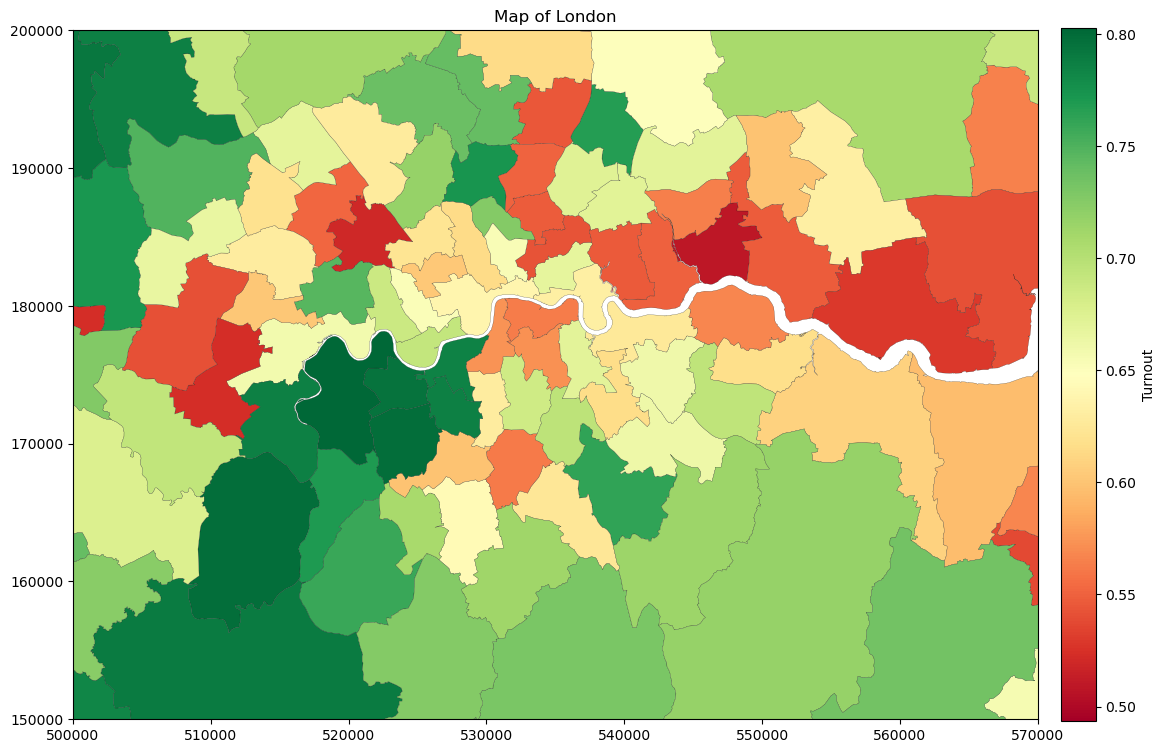

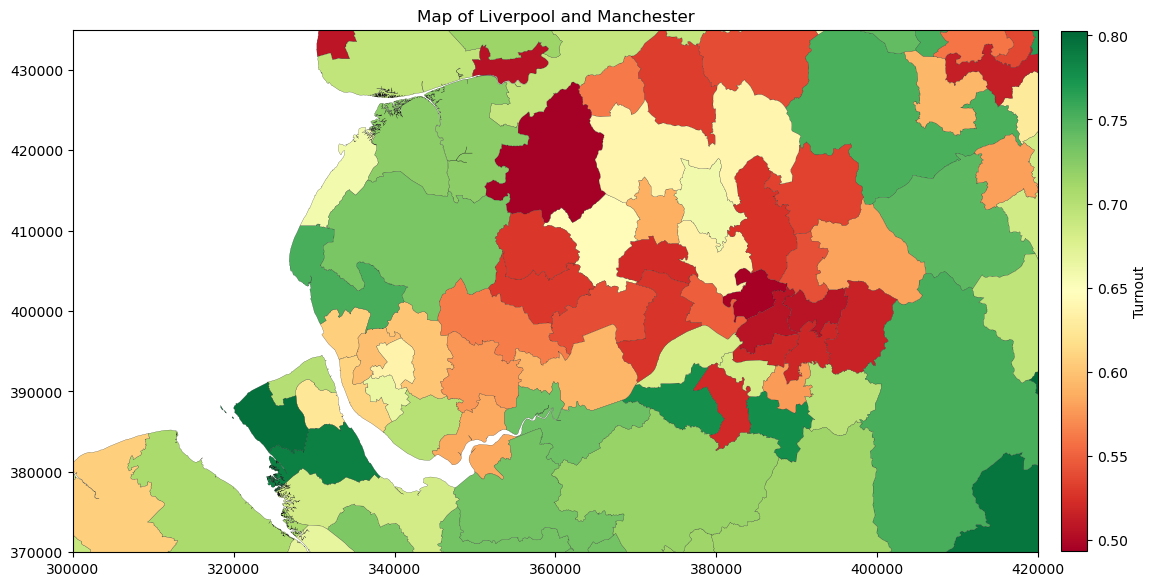

In [40]:
fig, ax = plt.subplots(figsize=(15, 15))  
ax.set_xlim(500000, 570000)  
ax.set_ylim(150000, 200000)
merged_data.plot(ax=ax, column='turnout_percentage', cmap='RdYlGn', linewidth=0.15, edgecolor='0.1')  
norm = Normalize(vmin=merged_data['turnout_percentage'].min(), vmax=merged_data['turnout_percentage'].max())
sm = cm.ScalarMappable(cmap='RdYlGn', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.6, aspect=20, pad=0.02)  
cbar.set_label('Turnout')  
ax.set_title('Map of London')  
plt.show()  

fig, ax = plt.subplots(figsize=(15, 15))  
ax.set_xlim(300000, 420000)  
ax.set_ylim(370000, 435000) 
merged_data.plot(ax=ax, column='turnout_percentage', cmap='RdYlGn', linewidth=0.15, edgecolor='0.1')  
norm = Normalize(vmin=merged_data['turnout_percentage'].min(), vmax=merged_data['turnout_percentage'].max())
sm = cm.ScalarMappable(cmap='RdYlGn', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.45, aspect=20, pad=0.02)  
cbar.set_label('Turnout')  
ax.set_title('Map of Liverpool and Manchester') 
plt.show()   


В Северной Ирландии Избирателей всего: 1293971, Проголосовало: 799035, Явка - 61.8%

В Уэльсе избирателей всего: 2319826, Проголосовало: 1544357, Явка - 66.6%

В Англии избирателей всего: 39895849, Проголосовало: 26911657, Явка - 67.5%

В Шотландии избирателей всего: 4053056, Проголосовало: 2759061, Явка - 68.1%


a = 0.8147626248975248 b = -10427.808452775149 для England
England Оценка производительности модели на тестовой выборке: 0.6737041463323118
Квадратный корень из среднеквадратичной ошибки (RMSE): 4199.935124734234
Среднее абсолютное отклонение: 3357.3999467486015
Квадратный корень из MSE для фолда 1: 3575.495706738019
Квадратный корень из MSE для фолда 2: 4322.685183021692
Квадратный корень из MSE для фолда 3: 4241.01742852169
Квадратный корень из MSE для фолда 4: 3844.9024764808323
Квадратный корень из MSE для фолда 5: 4304.863802384518
Квадратный корень из MSE для фолда 6: 4854.307483363742
Средний квадратный корень из MSE: 4190.545346751748


a = 0.8198544408726599 b = -95

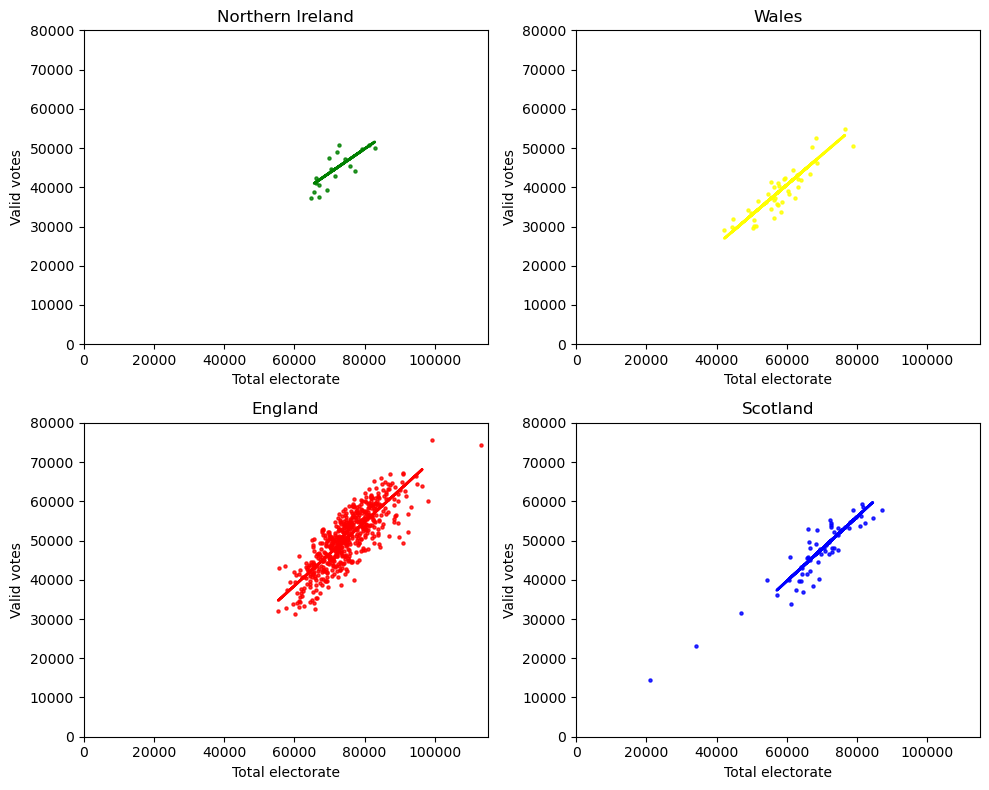

In [58]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import math
file_path = "HoC-GE2019-results-by-constituency.csv"
df = pd.read_csv(file_path)
df['Country name']= df.iloc[:, 5].replace({'England':'red', 'Wales':'yellow', 'Scotland':'blue', 'Northern Ireland':'green'})
NorthIr = df.loc[df['Country name'] == 'green']
x_values = NorthIr.iloc[:, 14]  
y_values = NorthIr.iloc[:, 15]
xsum = sum(x_values)
ysum = sum(y_values)
print(f"\nВ Северной Ирландии Избирателей всего: {xsum}, Проголосовало: {ysum}, Явка - {100*ysum/xsum:.1f}%")

wales = df.loc[df['Country name'] == 'yellow']
x_values = wales.iloc[:, 14]  
y_values = wales.iloc[:, 15]
xsum = sum(x_values)
ysum = sum(y_values)
print(f"\nВ Уэльсе избирателей всего: {xsum}, Проголосовало: {ysum}, Явка - {100*ysum/xsum:.1f}%")

england = df.loc[df['Country name'] == 'red']
x_values = england.iloc[:, 14]  
y_values = england.iloc[:, 15]
xsum = sum(x_values)
ysum = sum(y_values)
print(f"\nВ Англии избирателей всего: {xsum}, Проголосовало: {ysum}, Явка - {100*ysum/xsum:.1f}%")

scotland = df.loc[df['Country name'] == 'blue']
x_values = scotland.iloc[:, 14]  
y_values = scotland.iloc[:, 15]
xsum = sum(x_values)
ysum = sum(y_values)
print(f"\nВ Шотландии избирателей всего: {xsum}, Проголосовало: {ysum}, Явка - {100*ysum/xsum:.1f}%")

def plot_distribution(data_array, subplot_num, name, clr):
    x_values = data_array.iloc[:, 14]  
    y_values = data_array.iloc[:, 15]  
    x_train, x_test, y_train, y_test = train_test_split(data_array.iloc[:, [14]].values.reshape(-1, 1), 
                                                    data_array.iloc[:, 15], 
                                                    test_size=0.3, 
                                                    random_state=41)

    model = LinearRegression()
    model.fit(x_train, y_train)
    a = model.coef_[0]
    b = model.intercept_
    print(f"\n\na = {a} b = {b} для {name}")
    score = model.score(x_test, y_test)
    print(f"{name} Оценка производительности модели на тестовой выборке: {score}")

    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    print("Квадратный корень из среднеквадратичной ошибки (RMSE):", rmse)

    absolute_deviation = np.abs(y_pred - y_test)
    mean_absolute_deviation = np.mean(absolute_deviation)
    print("Среднее абсолютное отклонение:", mean_absolute_deviation)
    kf = KFold(n_splits=6, shuffle=True, random_state=42)

    cv_scores = -cross_val_score(model, x_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    cv_rmse_scores = np.sqrt(cv_scores)

    for i, score in enumerate(cv_rmse_scores):
        print(f"Квадратный корень из MSE для фолда {i+1}: {score}")
    print("Средний квадратный корень из MSE:", np.mean(cv_rmse_scores))
    plt.subplot(2, 2, subplot_num)
    plt.scatter(x_values, y_values, s=5, alpha=0.8, c = clr)  

    plt.plot(x_train, model.predict(x_train), color=clr, linewidth=2)

    plt.xlim(0, 115000)  
    plt.ylim(0, 80000)
    plt.xlabel('Total electorate') 
    plt.ylabel('Valid votes')
    plt.title(name)
    
plt.figure(figsize=(10, 8))
plot_distribution(england, 3, 'England', 'Red')
plot_distribution(scotland, 4, 'Scotland', 'Blue')
plot_distribution(wales, 2, 'Wales', 'Yellow')
plot_distribution(NorthIr, 1, 'Northern Ireland', 'Green')
plt.tight_layout()
plt.show()






В Borough избирателей всего: 19218570, Проголосовало: 12496287, Явка - 65.0%

В Burgh избирателей всего: 1298206, Проголосовало: 852626, Явка - 65.7%

В County избирателей всего: 27045926, Проголосовало: 18665197, Явка - 69.0%


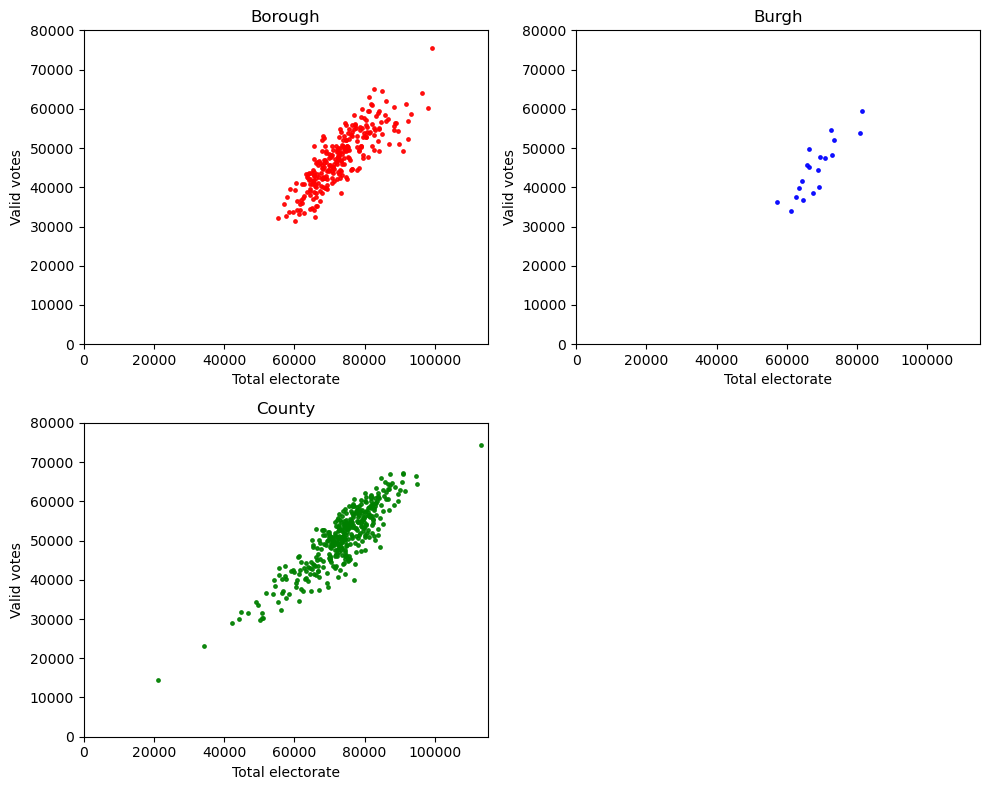

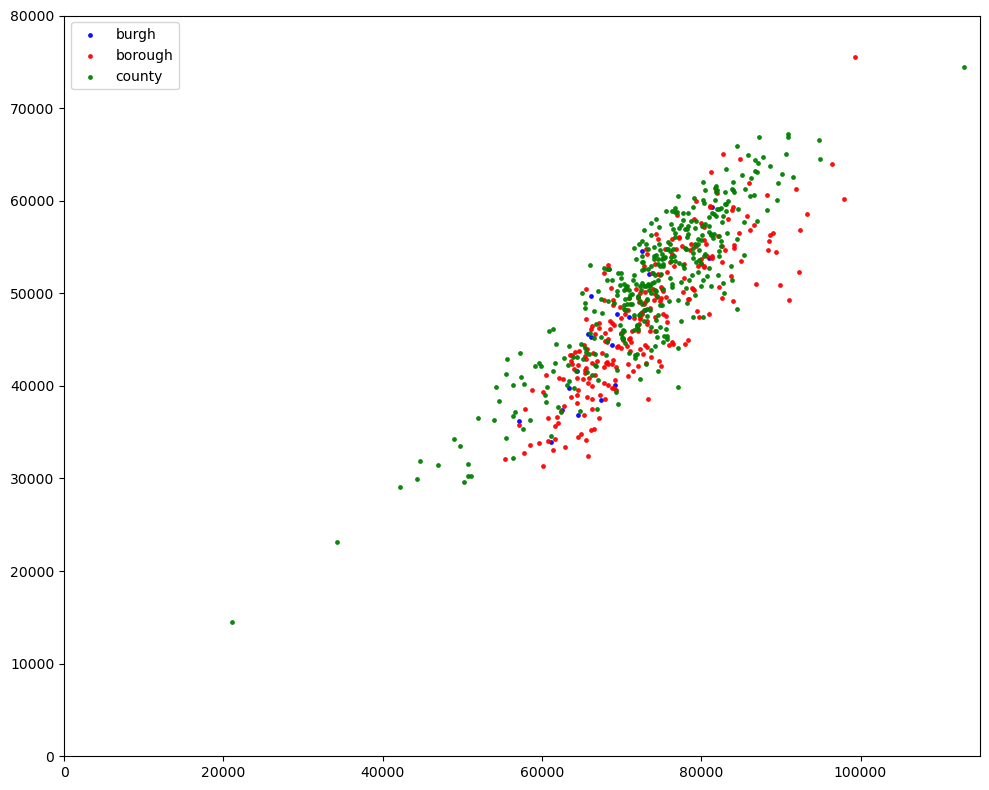

In [60]:
borough = df.loc[df['Constituency type'] == 'Borough']
x_values = borough.iloc[:, 14]  
y_values = borough.iloc[:, 15]
xsum = sum(x_values)
ysum = sum(y_values)
print(f"\nВ Borough избирателей всего: {xsum}, Проголосовало: {ysum}, Явка - {100*ysum/xsum:.1f}%")

burgh = df.loc[df['Constituency type'] == 'Burgh']
x_values = burgh.iloc[:, 14]  
y_values = burgh.iloc[:, 15]
xsum = sum(x_values)
ysum = sum(y_values)
print(f"\nВ Burgh избирателей всего: {xsum}, Проголосовало: {ysum}, Явка - {100*ysum/xsum:.1f}%")

county = df.loc[df['Constituency type'] == 'County']
x_values = county.iloc[:, 14]  
y_values = county.iloc[:, 15]
xsum = sum(x_values)
ysum = sum(y_values)
print(f"\nВ County избирателей всего: {xsum}, Проголосовало: {ysum}, Явка - {100*ysum/xsum:.1f}%")

def plot_distribution(data_array, subplot_num, name, clr):

    x_values = data_array.iloc[:, 14] 
    y_values = data_array.iloc[:, 15]  
   
    
    plt.subplot(2, 2, subplot_num)
    plt.scatter(x_values, y_values, s=6, alpha=0.9, c = clr) 
    plt.xlim(0, 115000) 
    plt.ylim(0, 80000)
    plt.xlabel('Total electorate') 
    plt.ylabel('Valid votes')
    plt.title(name)


plt.figure(figsize=(10, 8))
plot_distribution(burgh, 2, 'Burgh', 'Blue')
plot_distribution(borough, 1, 'Borough', 'Red')
plot_distribution(county, 3, 'County', 'Green')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(burgh.iloc[:, 14], burgh.iloc[:, 15], color='blue', label='burgh',s=6, alpha=0.9)
plt.scatter(borough.iloc[:, 14], borough.iloc[:, 15], color='red', label='borough',s=6, alpha=0.9)
plt.scatter(county.iloc[:, 14], county.iloc[:, 15], color='green', label='county',s=6, alpha=0.9)
plt.xlim(0, 115000)  
plt.ylim(0, 80000)
plt.legend()
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

55


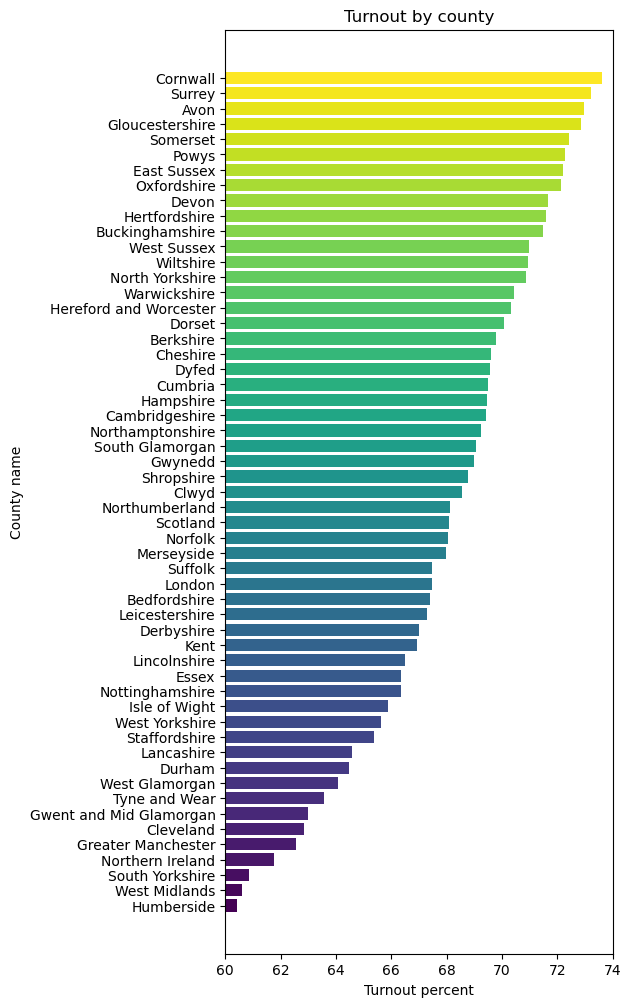

In [140]:
import pandas as pd

grouped = df.groupby(df.iloc[:, 3])
turnout=[]
for name, group in grouped:
    x_values = group.iloc[:, 14]  
    y_values = group.iloc[:, 15]
    xsum = sum(x_values)
    ysum = sum(y_values)
    turnout.append((100*ysum/xsum, name))
plt.figure(figsize=(5, 12))
sorted_turnout = sorted(turnout, key=lambda x: x[0])



percentages = [t[0] for t in sorted_turnout]
names = [t[1] for t in sorted_turnout]
colors = plt.cm.viridis(np.linspace(0, 1, len(percentages)))


plt.barh(names, percentages, color=colors)
plt.xlim(60, 74)  

plt.title('Turnout by county')
plt.xlabel('Turnout percent')
plt.ylabel('County name')


plt.show()

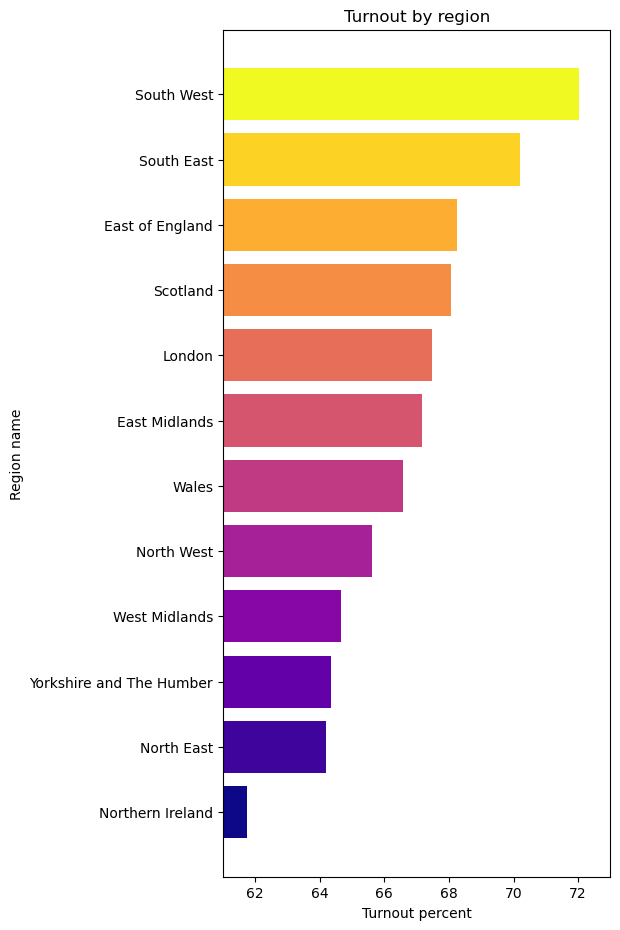

In [6]:
import pandas as pd

grouped = df.groupby(df.iloc[:, 4])


turnout=[]
for name, group in grouped:
    x_values = group.iloc[:, 14]  
    y_values = group.iloc[:, 15]
    xsum = sum(x_values)
    ysum = sum(y_values)
    turnout.append((100*ysum/xsum, name))
plt.figure(figsize=(5, 11))
sorted_turnout = sorted(turnout, key=lambda x: x[0])
percentages = [t[0] for t in sorted_turnout]
names = [t[1] for t in sorted_turnout]
colors = plt.cm.plasma(np.linspace(0, 1, len(percentages)))
plt.barh(names, percentages, color=colors)
plt.xlim(61, 73) 
plt.title('Turnout by region')
plt.xlabel('Turnout percent')
plt.ylabel('Region name')
plt.show()

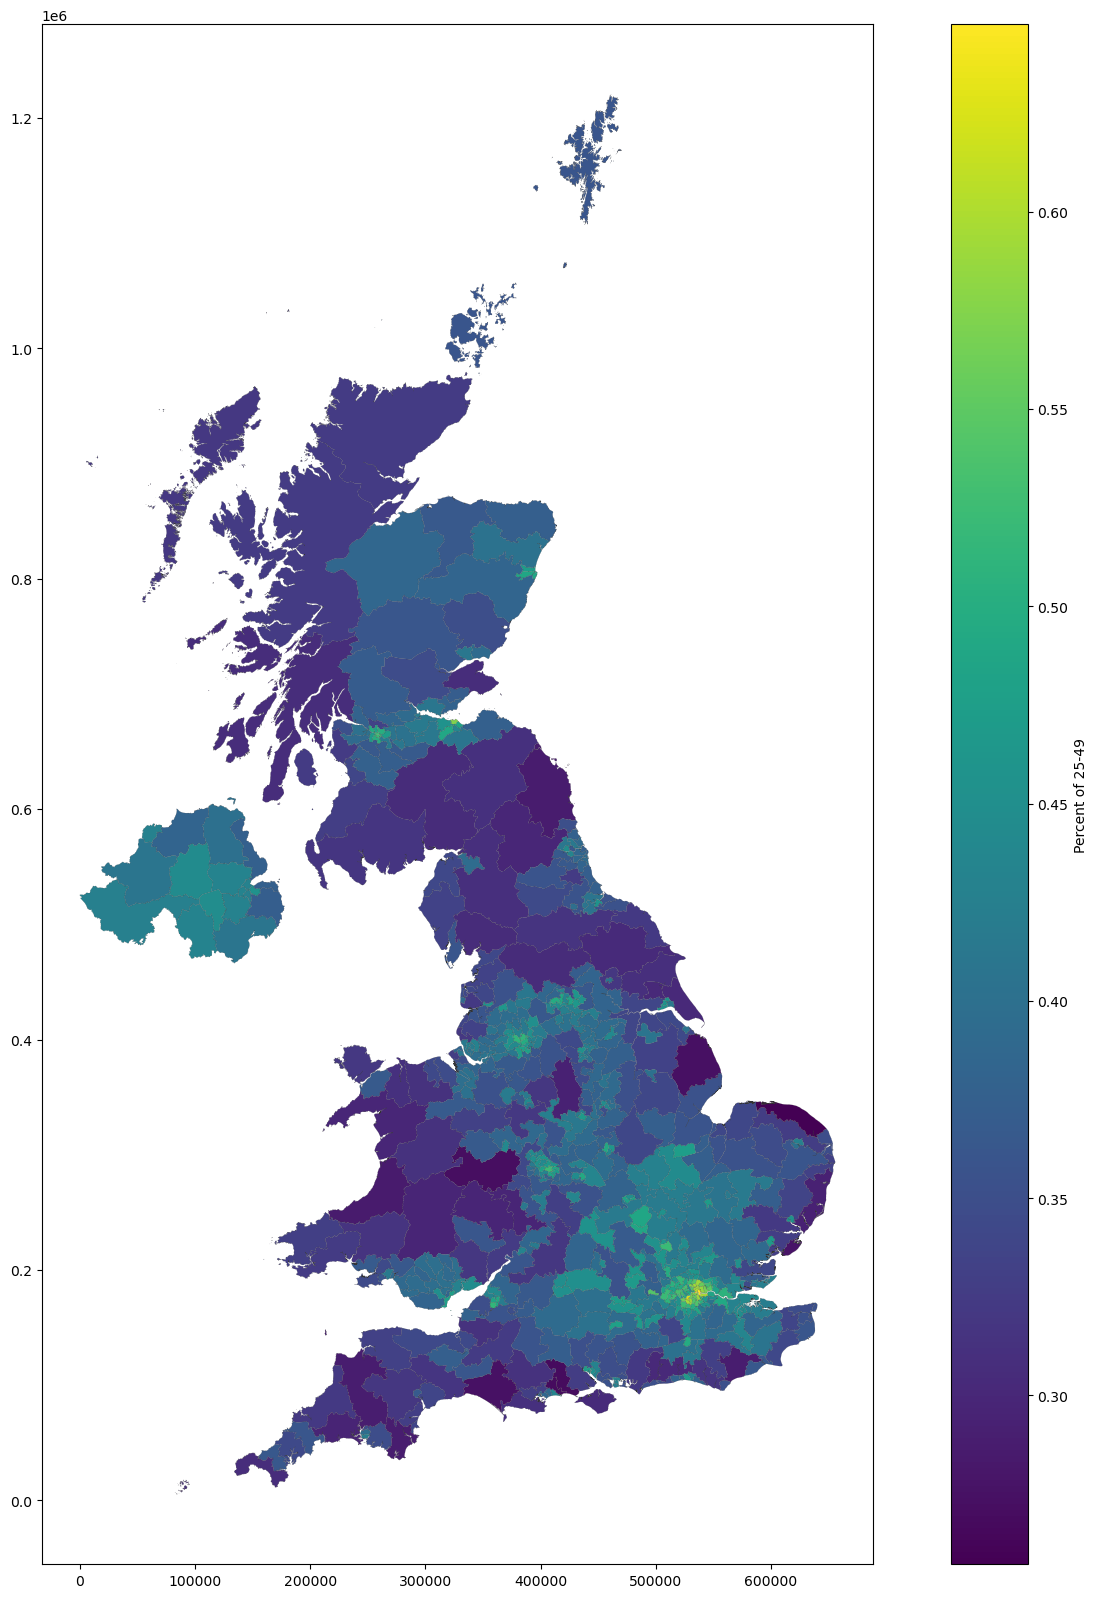

In [89]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import pandas as pd
df_second_sheet = pd.read_excel('population_by_age.xlsx', sheet_name=1)
f_df = df_second_sheet.loc[df_second_sheet['age'] == '0 to 17']
f_df = f_df.reset_index(drop=True)
f_df = f_df.iloc[:, [0, 8]]
filtered_df = df_second_sheet[df_second_sheet['age'].isin(['35 to 49', '25 to 34'])]
new_df = filtered_df.groupby('con_code')['con_pc'].sum().reset_index()
new_df['con_pc'] = new_df['con_pc'] / (1.0 - f_df['con_pc'])
elections = gpd.read_file('WPC_Dec_2019.geojson')
new_df.columns = ['pcon19cd', 'young_percentage']
merged_data = elections.merge(new_df, on='pcon19cd', how='left')
fig, ax = plt.subplots(figsize=(20, 20))
merged_data.plot(ax=ax, column='young_percentage', cmap='viridis', linewidth=0.1, edgecolor='0.2',figsize=(20,20))
norm = Normalize(vmin=merged_data['young_percentage'].min(), vmax=merged_data['young_percentage'].max())
sm = cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Percent of 25-49')
plt.show()

['red' 'blue' 'yellow']
['East Midlands' 'South East' 'Yorkshire and The Humber' 'North West'
 'North East' 'East of England' 'South West' 'West Midlands' 'Scotland'
 'Wales']
     young_percentage 25-34  young_percentage 35-49
0                  0.154138                0.217729
1                  0.101348                0.201072
2                  0.154795                0.224173
3                  0.163743                0.243543
4                  0.180580                0.281382
..                      ...                     ...
346                0.159419                0.234239
347                0.165176                0.230939
348                0.159995                0.240214
349                0.161236                0.229108
350                0.149901                0.231133

[351 rows x 2 columns]


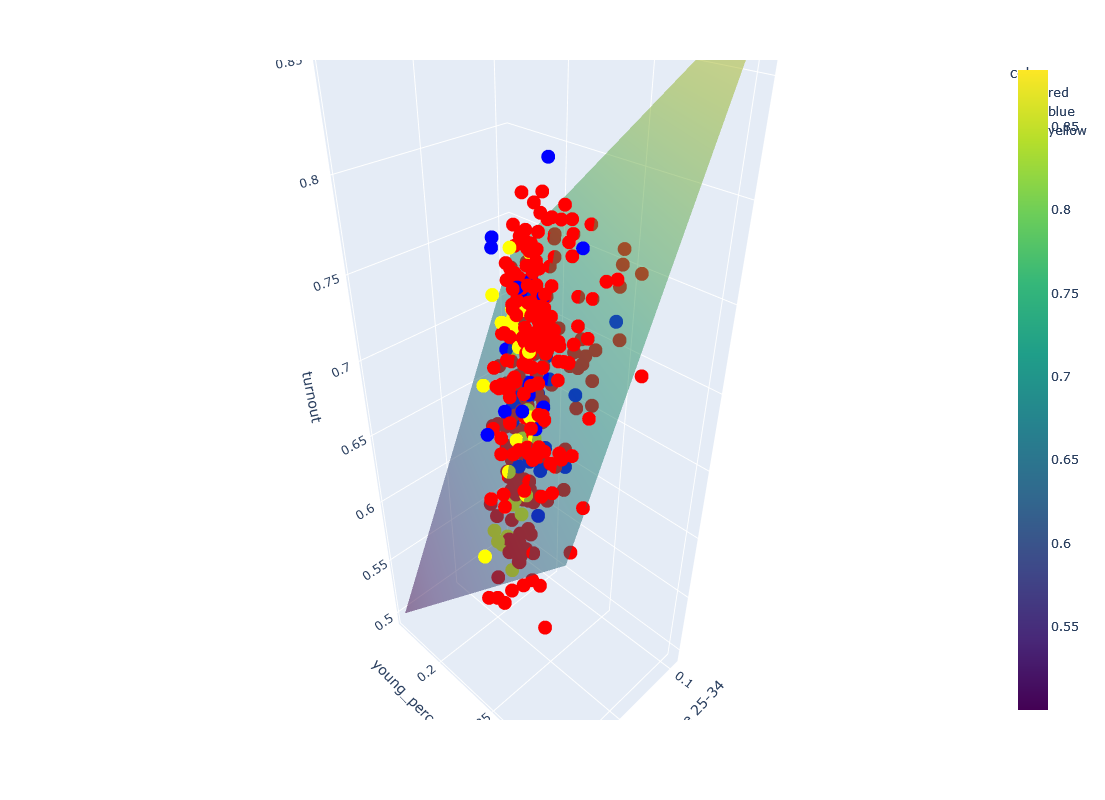



a = [-2.21308752  1.10186278] b = 0.7605341297442989
 Оценка производительности модели на тестовой выборке: 0.4639516762425563
Квадратный корень из среднеквадратичной ошибки (RMSE): 0.03604844301896914
Среднее абсолютное отклонение: 0.026927048847753463
Квадратный корень из MSE для фолда 1: 0.03476497605632412
Квадратный корень из MSE для фолда 2: 0.035411586803958395
Квадратный корень из MSE для фолда 3: 0.0415225101528858
Квадратный корень из MSE для фолда 4: 0.03745678310956503
Квадратный корень из MSE для фолда 5: 0.03648695881668176
Средний квадратный корень из MSE: 0.03712856298788302


In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
import plotly.express as px
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

df_second_sheet = pd.read_excel('population_by_age.xlsx', sheet_name=1)
f_df = df_second_sheet.loc[df_second_sheet['age'] == '0 to 17']
f_df = f_df.reset_index(drop=True)
f_df = f_df.iloc[:, [0, 8]]

filtered_df = df_second_sheet[df_second_sheet['age'].isin(['18 to 24'])]
new_df = filtered_df.groupby('con_code')['con_pc'].sum().reset_index()
new_df['con_pc'] = new_df['con_pc'] / (1.0 - f_df['con_pc'])
new_df.columns = ['pcon19cd', 'young_percentage 18-24']

filtered_df1 = df_second_sheet[df_second_sheet['age'].isin(['25 to 34'])]
new_df1 = filtered_df1.groupby('con_code')['con_pc'].sum().reset_index()
new_df1['con_pc'] = new_df1['con_pc'] / (1.0 - f_df['con_pc'])
new_df1.columns = ['pcon19cd', 'young_percentage 25-34']

filtered_df2 = df_second_sheet[df_second_sheet['age'].isin(['35 to 49'])]
new_df2 = filtered_df2.groupby('con_code')['con_pc'].sum().reset_index()
new_df2['con_pc'] = new_df2['con_pc'] / (1.0 - f_df['con_pc'])
new_df2.columns = ['pcon19cd', 'young_percentage 35-49']

filtered_df3 = df_second_sheet[df_second_sheet['age'].isin(['50 to 64'])]
new_df3 = filtered_df3.groupby('con_code')['con_pc'].sum().reset_index()
new_df3['con_pc'] = new_df3['con_pc'] / (1.0 - f_df['con_pc'])
new_df3.columns = ['pcon19cd', 'young_percentage 50-64']

file_path = "HoC-GE2019-results-by-constituency.csv"
df = pd.read_csv(file_path)
df['Country name']= df.iloc[:, 5].replace({'England':'red', 'Wales':'yellow', 'Scotland':'blue', 'Northern Ireland':'green'})
df = df.sort_values(by=df.columns[0])
df = df[df['Constituency type'] == 'County']
df = df[df['Country name'].isin(['red', 'yellow', 'blue'])]
df = df[df['Region name'] != 'London']
unique_values = df['Country name'].unique()
print(unique_values)
unique_values = df['Region name'].unique()
print(unique_values)
df = df.reset_index(drop=True)

new_df = new_df.sort_values(by=new_df.columns[0])
new_df = new_df[new_df.iloc[:, 0].isin(df.iloc[:, 0])]
new_df = new_df.reset_index(drop=True)
young = new_df['young_percentage 18-24']

new_df1 = new_df1.sort_values(by=new_df1.columns[0])
new_df1 = new_df1[new_df1.iloc[:, 0].isin(df.iloc[:, 0])]
new_df1 = new_df1.reset_index(drop=True)
young1 = new_df1['young_percentage 25-34']

new_df2 = new_df2.sort_values(by=new_df2.columns[0])
new_df2 = new_df2[new_df2.iloc[:, 0].isin(df.iloc[:, 0])]
new_df2 = new_df2.reset_index(drop=True)
young2 = new_df2['young_percentage 35-49']

new_df3 = new_df3.sort_values(by=new_df3.columns[0])
new_df3 = new_df3[new_df3.iloc[:, 0].isin(df.iloc[:, 0])]
new_df3 = new_df3.reset_index(drop=True)
young3 = new_df3['young_percentage 50-64']





#younger = pd.concat([young, young1], axis=1)
younger = pd.concat([young1, young2], axis=1)
#younger = pd.concat([younger, young3], axis=1)
print(younger)
x_values = df.iloc[:, 14]  
y_values = df.iloc[:, 15] 
z_values = y_values/x_values


fig = px.scatter_3d(x=younger.iloc[:, 0], y=younger.iloc[:, 1], z=z_values, color=df['Country name'], 
                    color_discrete_sequence=['red', 'blue','yellow'], size_max=0.1, width=1200, height=800)



fig.update_layout(scene=dict(xaxis_title=younger.columns[0], yaxis_title=younger.columns[1], zaxis_title='turnout'))

x_train, x_test, y_train, y_test = train_test_split(younger, z_values, test_size=0.20, random_state = 30)

model = LinearRegression()
model.fit(x_train, y_train)
a = model.coef_
b = model.intercept_

coef = model.coef_
intercept = model.intercept_
x_grid, y_grid = np.meshgrid(np.linspace(x_train.iloc[:, 0].min(), x_train.iloc[:, 0].max(), 100),
                             np.linspace(x_train.iloc[:, 1].min(), x_train.iloc[:, 1].max(), 100))
z_plane = coef[0] * x_grid + coef[1] * y_grid + intercept
fig.add_trace(go.Surface(x=x_grid, y=y_grid, z=z_plane, opacity=0.5, colorscale='viridis'))
fig.show()  

print(f"\n\na = {a} b = {b}")
score = model.score(x_test, y_test)
print(f" Оценка производительности модели на тестовой выборке: {score}")

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("Квадратный корень из среднеквадратичной ошибки (RMSE):", rmse)

absolute_deviation = np.abs(y_pred - y_test)
mean_absolute_deviation = np.mean(absolute_deviation)
print("Среднее абсолютное отклонение:", mean_absolute_deviation)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = -cross_val_score(model, x_train, y_train, cv=kf, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(cv_scores)
for i, score in enumerate(cv_rmse_scores):
    print(f"Квадратный корень из MSE для фолда {i+1}: {score}")
print("Средний квадратный корень из MSE:", np.mean(cv_rmse_scores))

